## **1. Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import sklearn

### 1.1 Understand the Dataset

In [26]:
# Load the dataset
df = pd.read_csv('bank churn.csv')

# Examine the dimension of the dataset
df.shape

(165034, 14)

The dataset contains more than 160,000 rows, which is quite enough to build a machine learning model. It has 14 columns, 10 of which (`CreditScore`, `Geography`, `Gender`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `EstimatedSalary`) are useful features and one of them is the target variable `Exited` indicating whether the customer has exited the bank or not.

In [3]:
# Examine top 10 rows of the dataset
df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1,0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1,0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1,0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1,0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1,1,170843.07,0


In [4]:
# check the data types: columns with mixed types are stored with the object dtype.
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The feature types are what we would normally expect. Numerical features include: `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`. Categorical features include: `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`. In these categorical features, `HasCrCard` and `IsActiveMember` are already in encoded format.

## 1.2 Data Cleaning

In [5]:
# Check missing values
null_sum = df.isnull().sum()
null_sum

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values in this dataset, as observed from the above result and described from the original source: https://www.kaggle.com/competitions/playground-series-s4e1/data.

This dataset is generated from a deep learning model trained on the original "Bank Customer Churn Prediction" dataset from Kaggle.

### 1.3 Detect Outliers

#### 1.3.1 Categorical Variables

In [6]:
# count the #samples fall into each category
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

A larger amount of customers are located in France, while the number of customers located in Spain and Germany are very close.

In [7]:
# count the #samples fall into each category
df['Gender'].value_counts() 

Gender
Male      93150
Female    71884
Name: count, dtype: int64

There are more male observations than female observations. This could be useful as one of the possible reasons for model performance in later stages.

In [8]:
# count the #samples fall into each category
df['HasCrCard'].value_counts()

HasCrCard
1    124428
0     40606
Name: count, dtype: int64

Around 75% of the customers do have a credit card.

In [9]:
# count the #samples fall into each category
df['IsActiveMember'].value_counts()

IsActiveMember
0    82885
1    82149
Name: count, dtype: int64

The distribution for whether the customer is an active member is quite even.

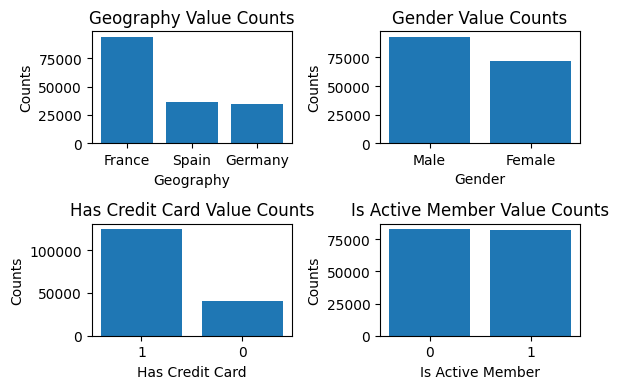

In [10]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of axes
fig, axs = plt.subplots(2, 2, figsize=(6, 4))  # You can adjust the figsize to fit your display

# Plot on each subplot
axs[0, 0].bar(df['Geography'].value_counts().index, df['Geography'].value_counts().values)
axs[0, 0].set_title('Geography Value Counts')
axs[0, 0].set_xlabel('Geography')
axs[0, 0].set_ylabel('Counts')

axs[0, 1].bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
axs[0, 1].set_title('Gender Value Counts')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Counts')

axs[1, 0].bar(df['HasCrCard'].value_counts().index.astype(str), df['HasCrCard'].value_counts().values)
axs[1, 0].set_title('Has Credit Card Value Counts')
axs[1, 0].set_xlabel('Has Credit Card')
axs[1, 0].set_ylabel('Counts')

axs[1, 1].bar(df['IsActiveMember'].value_counts().index.astype(str), df['IsActiveMember'].value_counts().values)
axs[1, 1].set_title('Is Active Member Value Counts')
axs[1, 1].set_xlabel('Is Active Member')
axs[1, 1].set_ylabel('Counts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


Through visualizing the distribution of the categorical variables in the data frame, it is obvious to see there is no obvious outliers in those features.

#### 1.3.2 Numerical Variables

In [11]:
# count the #samples fall into each category
df['CreditScore'].value_counts()

CreditScore
850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: count, Length: 457, dtype: int64

In [12]:
# count the #samples fall into each category
df['Age'].value_counts()

Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64

In [13]:
# count the #samples fall into each category
df['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [14]:
# count the #samples fall into each category
df['Balance'].value_counts()

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

In [15]:
# count the #samples fall into each category
df['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [16]:
# count the #samples fall into each category
df['EstimatedSalary'].value_counts()

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: count, Length: 55298, dtype: int64

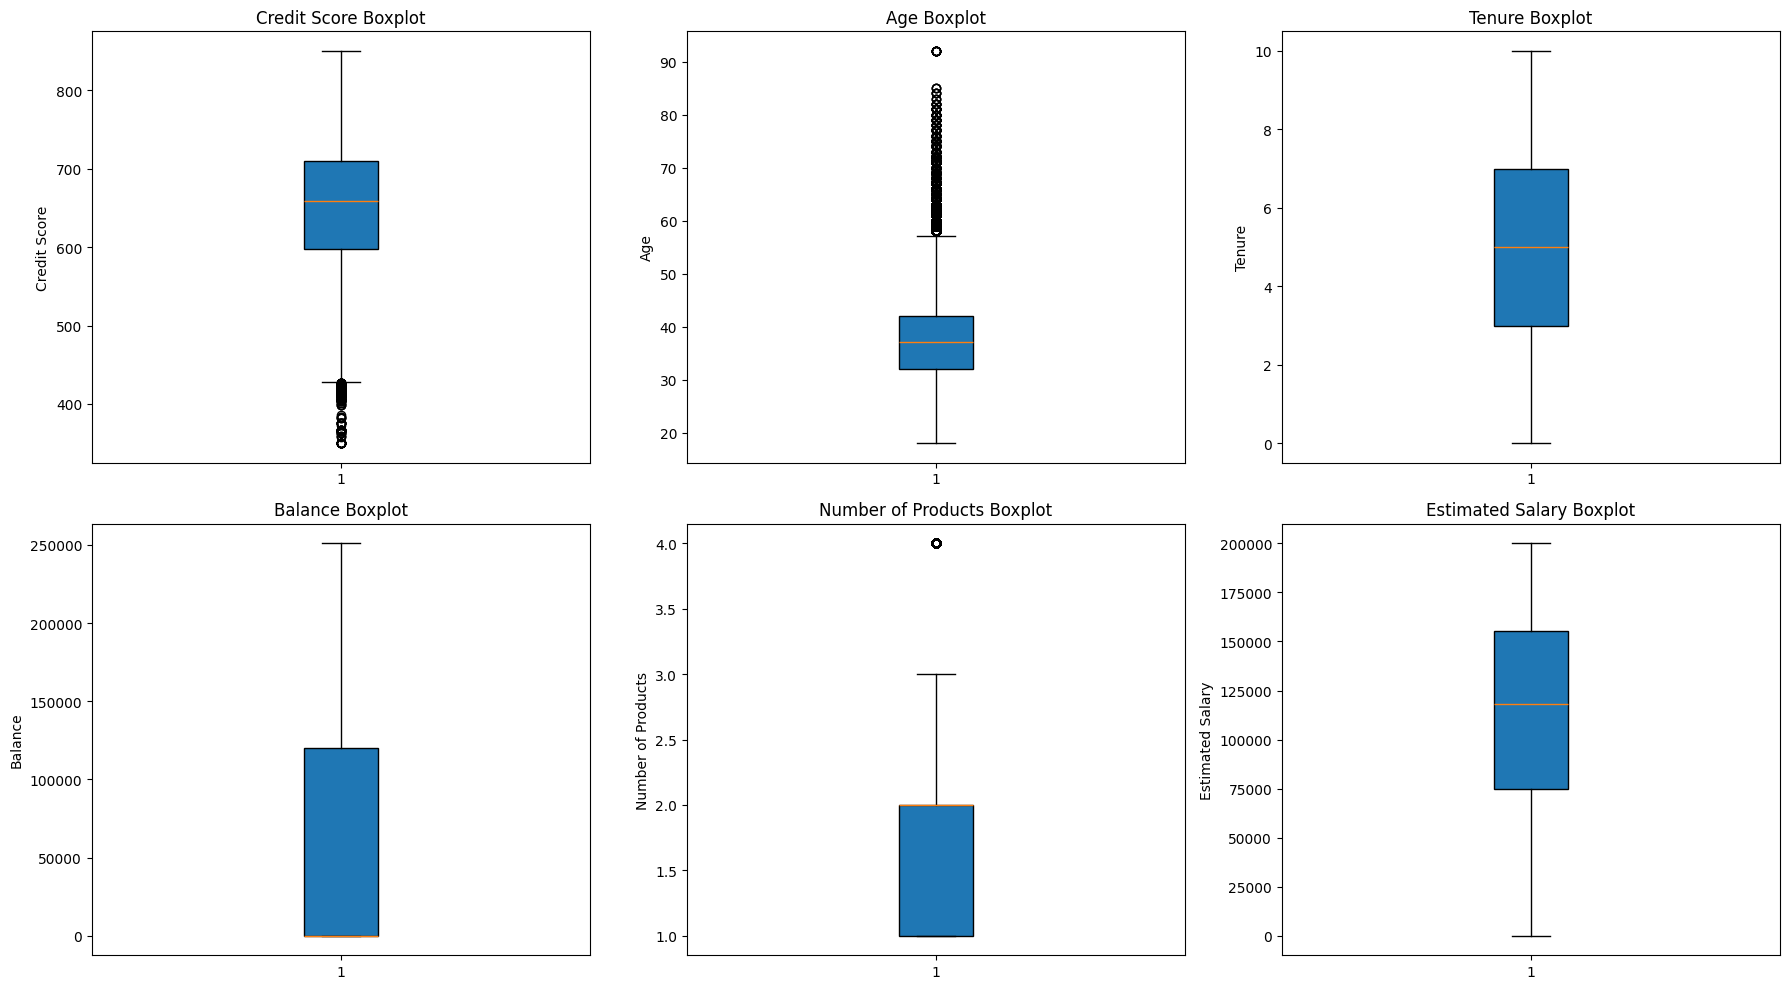

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and already defined.

# Create a 2x3 grid of axes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Adjust the figsize to better fit the display

# Plot boxplot for CreditScore
axs[0, 0].boxplot(df['CreditScore'].dropna(), patch_artist=True)  # dropna() removes missing values
axs[0, 0].set_title('Credit Score Boxplot')
axs[0, 0].set_ylabel('Credit Score')

# Plot boxplot for Age
axs[0, 1].boxplot(df['Age'].dropna(), patch_artist=True)
axs[0, 1].set_title('Age Boxplot')
axs[0, 1].set_ylabel('Age')

# Plot boxplot for Tenure
axs[0, 2].boxplot(df['Tenure'].dropna(), patch_artist=True)
axs[0, 2].set_title('Tenure Boxplot')
axs[0, 2].set_ylabel('Tenure')

# Plot boxplot for Balance
axs[1, 0].boxplot(df['Balance'].dropna(), patch_artist=True)
axs[1, 0].set_title('Balance Boxplot')
axs[1, 0].set_ylabel('Balance')

# Plot boxplot for NumOfProducts
axs[1, 1].boxplot(df['NumOfProducts'].dropna(), patch_artist=True)
axs[1, 1].set_title('Number of Products Boxplot')
axs[1, 1].set_ylabel('Number of Products')

# Plot boxplot for EstimatedSalary
axs[1, 2].boxplot(df['EstimatedSalary'].dropna(), patch_artist=True)
axs[1, 2].set_title('Estimated Salary Boxplot')
axs[1, 2].set_ylabel('Estimated Salary')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [27]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying to multiple columns in df
columns_to_filter = ['CreditScore', 'Age']
for col in columns_to_filter:
    df = remove_outliers(df, col)

In [28]:
df.shape

(158400, 14)

The number of observations decrease to 158,400 from 165,034.

### 1.3 Data Transformation and Feature Engineering

#### 1.3.1 Group features by types

#### 1.3.2 Numerical data: normalization/standardization

#### 1.3.3 Categorical data: one-hot encoding, ordinal encoding

### 1.4 Statistical Summary

#### 1.4.1 Basic statistics (mean, median, mode)

#### 1.4.2 Visualization (scatter plot, histograms, boxplot, heatmap, etc)

### 1.5 Correlation Analysis